## Q1: Vector Shapes

In [52]:
!pip install mapclassify #helper package
#import required packages
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString, MultiLineString
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Q1a

*There* are 5 points,4 LineStrings and 1 Polygon

### Q1b

In [53]:
## DO NOT MODIFY THE CODE BELOW ##
# list of Points objects in the map
locations = [Point(40,80), Point(55,80), Point(55,70),Point(47.5,65)]

# list of LineString objects in the map
lines = [LineString([Point(55,90), Point(55, 70), Point(47.5,65), Point(40, 70), Point(40,90)]),
        LineString([Point(55,80),Point(65,80)]),
        LineString([Point(30,70), Point(65,70)])]

## END OF DO NOT MODIFY ##

# The Point object in map that is missing in the above list
missing_location =  [Point(40, 70)]
 ## YOU CODE GOES HERE ##
# The LineString object in map that is missing in the above list
missing_line =  [LineString([Point(30, 65), Point(65, 65)])]
 ## YOU CODE GOES HERE ##

# The properties of the LineString
missing_line_properties =  'Train'
## YOU CODE GOES HERE ##


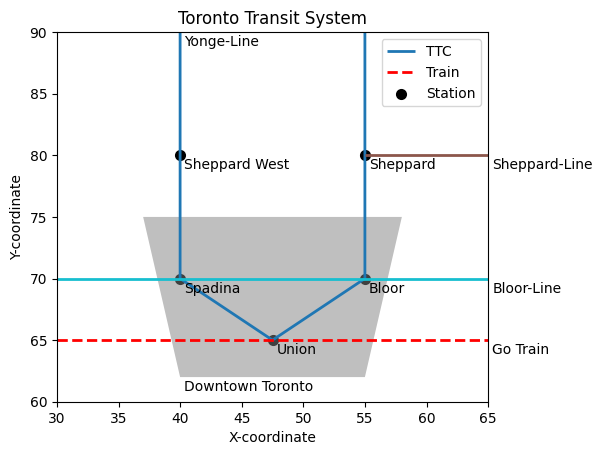

In [54]:
# run the following code to plot the map
## DO NOT MODIFY THE FOLLOWING CODE ##
locations = [Point(40,80)] + missing_location + [Point(55,80), Point(55,70),Point(47.5,65)]
lines = [lines[0]] + missing_line + [lines[1], lines[2]]
locations_name = ['Sheppard West', 'Spadina', 'Sheppard','Bloor', 'Union']
# List of location properties
location_properties = ['Station' for i in range(len(locations))]
# List of line names
lines_name = ['Yonge-Line', 'Go Train', 'Sheppard-Line', 'Bloor-Line']
# List of line properties
line_properties = ['TTC', missing_line_properties, 'TTC', 'TTC']
# Ploygon
polygon = [Polygon([Point(40,62), Point(55, 62), Point(58,75),Point(37, 75)])]
polygon_name = ['Downtown Toronto']
polygon_properties = ['Area']
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'name': lines_name + locations_name + polygon_name,'properties': line_properties + location_properties + polygon_properties,'geometry': lines + locations + polygon})
def plot_from_gdf(gdf) -> None:
    # given a GeoDataFrame, plot the geometries with different colors based on their properties
    # and annotate the name of the geometries
    for prop, color, linestyle, alpha in [('TTC', 'tab10', '-', 1), ('Train', 'red', '--', 1),
                                          ('Station', 'black', '-', 1), ('Area', 'grey', '-', 0.5)]:
        try:
            gdf[gdf['properties'] == prop].plot(color=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())
        except:
            gdf[gdf['properties'] == prop].plot(cmap=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())

    switch = {
        Point: lambda s: (s.x, s.y),
        # if the shape is a polygon, annotate at the last point
        LineString: lambda s: (s.xy[0][-1], s.xy[1][-1]),
        # if the shape is a polygon, annotate at the first point
        Polygon: lambda s: (s.exterior.coords.xy[0][0], s.exterior.coords.xy[1][0])
        }

    for shape, label in zip(gdf.geometry, gdf.name):
        xy = switch.get(type(shape))(shape)
        if xy:
            plt.annotate(label, xy=xy, xytext=(3, -10), textcoords="offset points")

    plt.xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    plt.ylim(60,90)
    plt.legend(['TTC', 'Train', 'Station'])
    plt.title('Toronto Transit System')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

plot_from_gdf(gdf)

### Q1c

part 1

In [55]:
### YOUR CODE HERE ###
user_location = [Point(40,80), Point(40, 70), Point(55,80), Point(55,70),Point(47.5,65)]

# Function to check if a point is within Downtown Toronto polygon
def is_within_downtown(point, downtown_polygon):
    return point.within(downtown_polygon)

# Get Downtown Toronto polygon
downtown_polygon = gdf[gdf['name'] == 'Downtown Toronto']['geometry'].iloc[0]

# Print stations within Downtown Toronto region
stations_within_downtown = gdf[(gdf['properties'] == 'Station') & gdf['geometry'].within(downtown_polygon)]
print("Stations within Downtown Toronto:")
print(stations_within_downtown['name'].tolist())


Stations within Downtown Toronto:
['Spadina', 'Bloor', 'Union']


part 2

In [56]:
# Check if user locations fall within Downtown Toronto
# Given a location (name or coordinate) and area (geo-fence), we can check whether the location is within the area
def location_within_area(gdf, location, area) -> bool:
    # Get the geometry of the location
    if isinstance(location, Point):
        geom_location = location
    else:
        geom_location = gdf.loc[gdf['name'] == location, 'geometry'].iloc[0]

    # Get the geometry of the area
    geom_area = gdf.loc[gdf['name'] == area, 'geometry'].iloc[0]

    # Check if the location is within the area
    return geom_area.contains(geom_location)


# or iterate through a list of locations
for location in user_location:
    within_downtown = location_within_area(gdf, location, 'Downtown Toronto')
    print(f"User at {location} is within Downtown Toronto: {within_downtown}")

User at POINT (40 80) is within Downtown Toronto: False
User at POINT (40 70) is within Downtown Toronto: True
User at POINT (55 80) is within Downtown Toronto: False
User at POINT (55 70) is within Downtown Toronto: True
User at POINT (47.5 65) is within Downtown Toronto: True


## Q2: CRS and ShapeFiles

### Q2a

In [39]:
### DO NOT CHANGE THE FOLLOWING CODE ###
#download the Shapefile
!wget https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
!os.mkdir('/content/cb_2018_us_state_500k')
!unzip cb_2018_us_state_500k.zip -d /content/cb_2018_us_state_500k

--2024-03-26 01:33:52--  https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip [following]
--2024-03-26 01:33:52--  https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3304931 (3.2M) [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip.2’

cb_2018_us_state_50 100%[===================>]   3.15M  --.-KB/s    in 0.09s   

2024-03-26 01:33:52 (36.8 MB/s) - ‘cb_2018_us_state_50

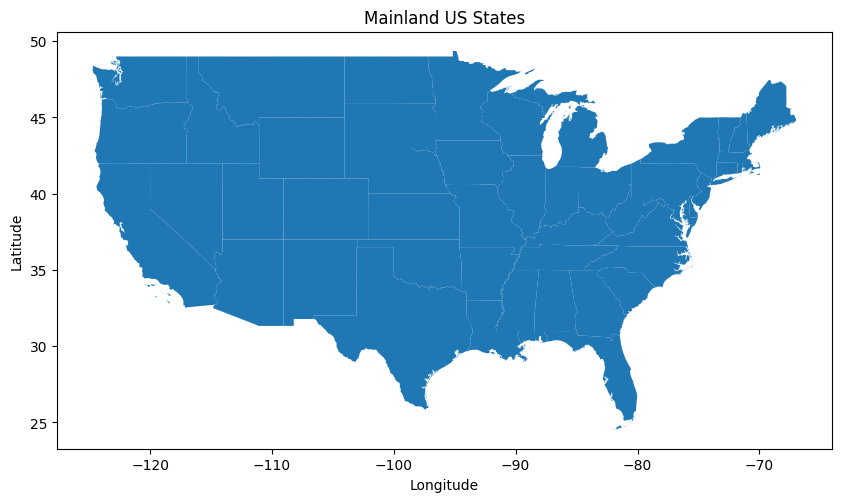

CRS: EPSG:4269


In [40]:
shape_file_location = 'cb_2018_us_state_500k' # location of the shapefile
### YOUR CODE HERE ###
gdf_states = gpd.read_file(shape_file_location)

### DO NOT CHANGE THE FOLLOWING CODE ###
gdf_states = gdf_states[['NAME', 'geometry']] # select the columns
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
##2011 something
### YOUR CODE HERE ###
# plotting map
gdf_states.plot(figsize=(10, 10))
plt.title('Mainland US States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# check CRS
print("CRS:", gdf_states.crs)


**Your Text Answer:** The coordinate reference system is CRS: EPSG:4269

### Q2b

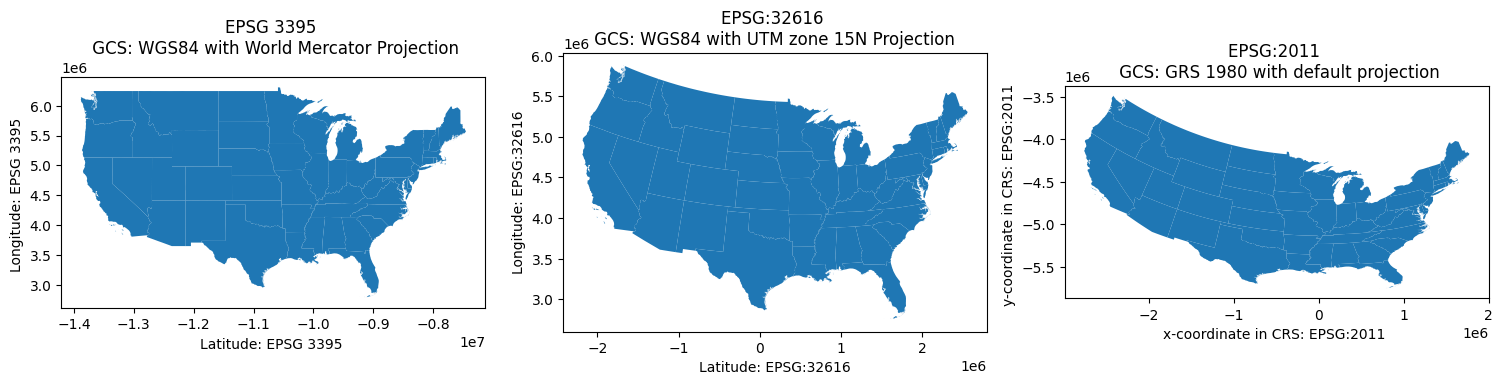

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax.flatten()

### YOUR CODE HERE ###
crs_list = [
       ("EPSG 3395 \n GCS: WGS84 with World Mercator Projection", gdf_states.to_crs('EPSG:3395')),
    # Change CRS by name
    ("EPSG:32616 \n GCS: WGS84 with UTM zone 15N Projection ", gdf_states.to_crs("WGS 84 / UTM zone 15N")),

    # using epsg parameter
    ("EPSG:2011 \n GCS: GRS 1980 with default projection", gdf_states.to_crs(epsg=7789)),

]
# Create subplots

# Plot each CRS
for i, (title, gdf) in enumerate(crs_list):
    gdf.plot(ax=ax[i],figsize=(5, 5))
    ax[i].set_title(title)
    if i < 2:
      ax[i].set_xlabel('Latitude: ' + title[0:10])
      ax[i].set_ylabel('Longitude: ' + title[0:10])
    else:
      ax[i].set_xlabel('x-coordinate in CRS: ' + title[0:10])
      ax[i].set_ylabel('y-coordinate in CRS: ' + title[0:10])

# Show plot
plt.tight_layout()
plt.show()

**Your Text Answer** The CRS that i find suitable for most plots is EPSG 32616, because it does not skew the image as you move further North. It also keeps a slight curve closer to the border.

### Q2c

In [65]:
### YOUR CODE HERE ###
# Count the number of vector shapes in the ShapeFile
vector_count = len(gdf_states)
print("Number of polygons:", vector_count)
# Select the first polygon in the MultiPolygon (assuming gdf_states.geometry[0] contains MultiPolygon)
polygon = gdf_states.geometry[4]
print('\nThe Type of the Shape: ', polygon.geom_type)
print('Number of points in the polygon: ', len(polygon.exterior.xy[0]))
#print('The bounds of the geometry: ', polygon.bounds)
print('Area: ', polygon.area)


Number of polygons: 49

The Type of the Shape:  Polygon
Number of points in the polygon:  3880
Area:  6.493879726220489


## Question 3: Choropleth By Popuplation

In [43]:
### DO NOT MODIFY THE FOLLOWING CODE ###
# download the data and prepare the data
death_by_state = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
death_by_state = death_by_state.drop(columns = ['UID', 'iso2', 'iso3', 'code3',
                                                      'FIPS', 'Admin2', 'Country_Region',
                                                        'Lat', 'Long_', 'Combined_Key'])
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
death_by_state = death_by_state[death_by_state['Province_State'].isin(gdf_states['Province_State'])]
death_by_state = death_by_state.groupby('Province_State').sum().reset_index()
death_by_month = death_by_state.iloc[:, 2:].T
death_by_month.index = pd.to_datetime(death_by_month.index)
death_by_month = death_by_month.resample('M').last()
death_by_month = death_by_month.T.reset_index(drop=True)
death_by_month[['Province_State','Population']] = death_by_state[['Province_State', 'Population']]
#reorder the columns
death_by_month = death_by_month[['Province_State', 'Population'] + [x for x in death_by_month.columns[0:-2]]]
death_by_month.columns = ['Province_State', 'Population'] + [x.strftime('%m-%Y') for x in death_by_month.columns[2:]]
death_by_month.head()

,Province_State,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,...,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023
0,Alabama,4903185,0,0,23,272,630,950,1580,2182,...,19755,19891,20048,20422,20558,20652,20737,20870,20932,21032
1,Arizona,7278717,0,0,25,320,907,1645,3694,5029,...,30515,30768,31114,31370,31548,31751,32182,32775,33042,33102
2,Arkansas,3017804,0,0,8,61,133,270,453,797,...,11581,11719,11918,12165,12489,12564,12695,12852,12980,13020
3,California,39512223,0,0,170,2001,4113,5990,9124,12861,...,92163,93409,94794,95863,96793,97435,98544,99988,100726,101159
4,Colorado,5758736,0,0,69,1251,1612,1724,1867,1965,...,12918,13078,13166,13316,13421,13609,13882,14034,14106,14181


### Q3a

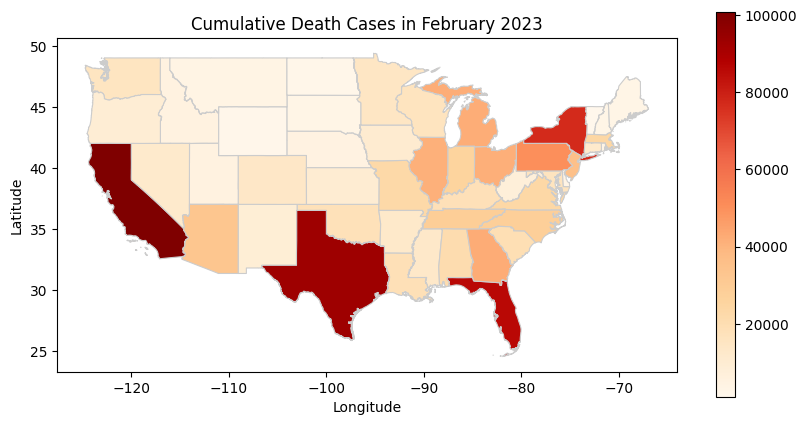

In [44]:
gdf_states.to_crs(epsg=4269, inplace=True)

### YOUR CODE HERE ###
# DataFrame 'death_by_month' contains the dataset for this problem
#gdf_death =  #Merging DataFrame 'death_by_month' with GeoDataFrame 'gdf_states'. The merged GeoDataFrame should be stored in 'gdf_death'

import matplotlib.pyplot as plt

# Merge the dataset with GeoDataFrame
# merge the population DataFrame with the GeoDataFrame
gdf_death = gdf_states[['Province_State', 'geometry']].merge(death_by_month)

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 5))
gdf_death.plot(column='02-2023', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
plt.title('Cumulative Death Cases in February 2023')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


**Your Text Answer**
State has the highest number of cumulative death cases: California (lowest) and state with the lowest: Wyoming (lightest).

### Q3b

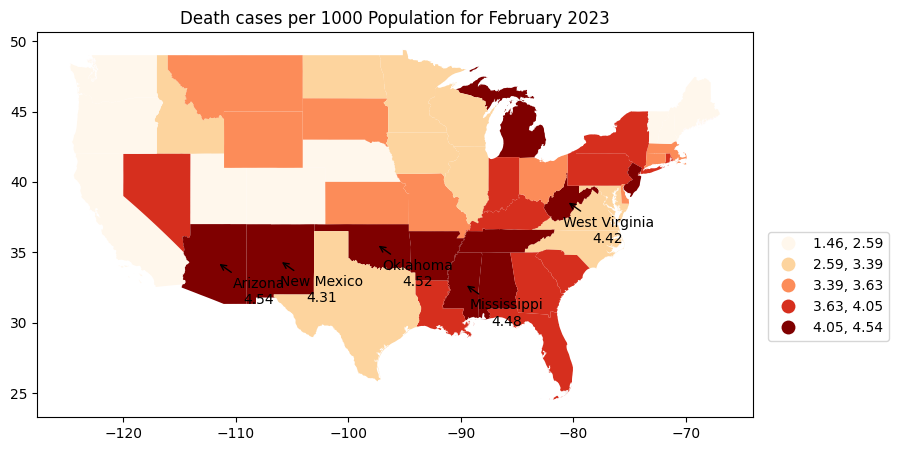

In [45]:
### YOUR CODE HERE ###
# Calculate death cases per 1000 Population for February 2023
current_month = gdf_death[['Province_State','02-2023','geometry','Population']]
# calculate the confirmed cases per 100 people in the state
current_month['Density'] = current_month['02-2023'] / current_month['Population'] * 1000

# visualize the density
fig, ax = plt.subplots(1,1, figsize=(15, 5))
plt.title('Death cases per 1000 Population for February 2023')

# By quantile scheme
current_month.plot(figsize=(5, 5), column='Density',scheme='quantiles',
                   cmap='OrRd',legend=True,ax=ax,
                   legend_kwds={"bbox_to_anchor": (1.2, 0.5)}) #ensure the legend does not block the map

# label the top 5 states with the highest confirmed cases by its name and value
max_cases_state = current_month.nlargest(5, 'Density') # get the top 5 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Density']):
    ax.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                     textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.show()




**Your Text Answer**
One difference I found is that the states with the highest and lowest culmulative deaths in 3a, are atually no longer visible in Death cases per 1000.The death cases per 1000 is more specific.

## Question 4: Choropleth By Time

In [46]:
### YOUR CODE HERE ###
def get_difference_between_timestamp(gdf) -> gpd.GeoDataFrame:
    # select columns that are not 'Province_State', 'geometry', and 'Population'
    col = [col for col in gdf.columns if col not in ['Province_State', 'geometry', 'Population']]

    gdf_newly_confirmed = gdf[col].diff(axis=1)
    # remove negative values (we only need the newly confirmed cases)
    gdf_newly_confirmed = gdf_newly_confirmed.clip(lower=0)
     # adding the first month's data
    gdf_newly_confirmed.iloc[:,0] = gdf[col[0]]
    # add the 'Province_State', 'geometry', and 'Population' columns
    gdf_newly_confirmed = gdf[['Province_State', 'geometry', 'Population']].join(gdf_newly_confirmed)
    # Every time we use a pandas function, we need to ensure that the result is
    # converted back to a GeoDataFrame if we intend to work with geographic data.
    gdf_newly_confirmed = gpd.GeoDataFrame(gdf_newly_confirmed)

    return gdf_newly_confirmed



In [47]:
gdf_newly_confirmed = get_difference_between_timestamp(gdf_death)
gdf_newly_confirmed.head()

,Province_State,geometry,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,...,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023
0,Mississippi,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",2976149,0,0,20,241,473,339,590,...,58,123,146,118,56,68,61,128,95,50
1,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",10488084,0,0,12,394,531,443,562,...,565,274,852,190,428,418,258,411,306,86
2,Oklahoma,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",3956971,0,0,23,199,112,53,154,...,0,811,392,262,194,154,158,240,235,85
3,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",8535519,0,0,27,525,823,388,411,...,209,320,498,433,350,219,252,465,514,17
4,West Virginia,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",1792147,0,0,1,40,34,18,23,...,116,92,130,130,106,89,61,177,77,34


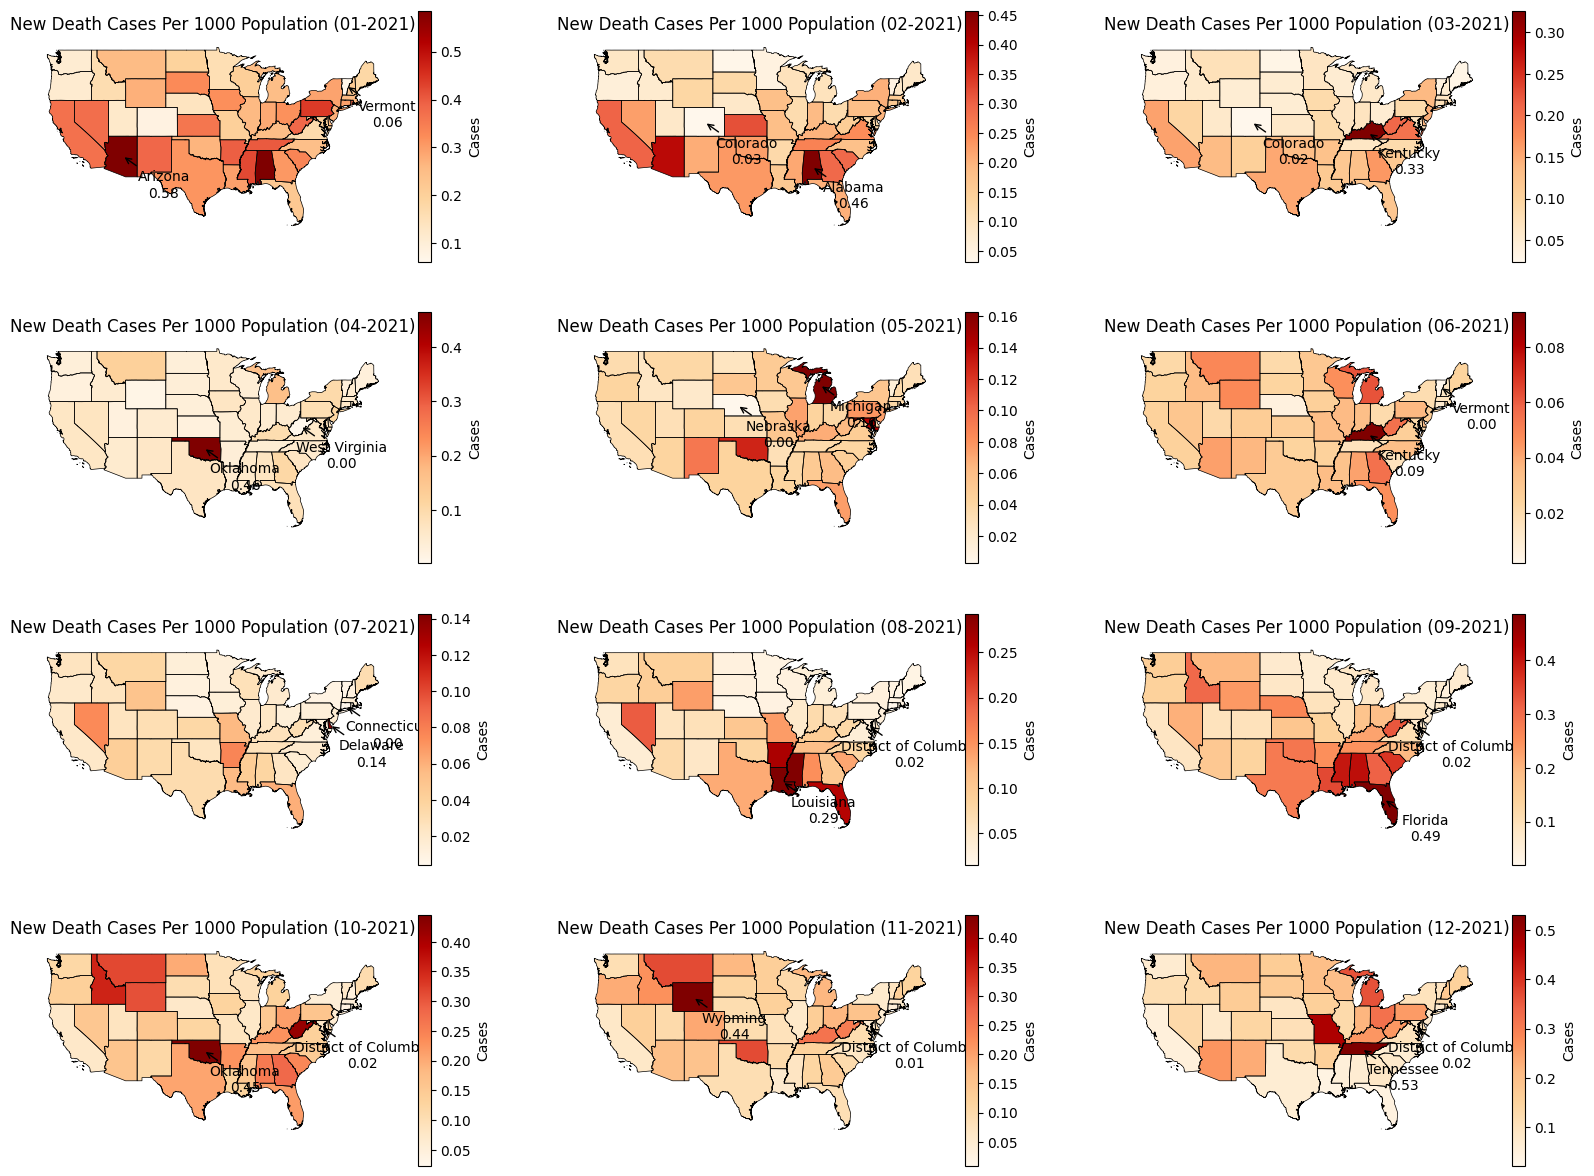

In [48]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()
## YOUR CODE HERE ##
# plot the new death cases per 100 population from 01-2021 to 12-2021
def choropleth_by_month(gdf, year, ax, title) -> None:
    # get year data
    current_year = [col for col in gdf.columns if year in col]
    # plot the data
    for i, month in enumerate(current_year):
        # select the month and calculate the density
        gdf_density = gdf[['Province_State', month, 'geometry',
                           'Population']]
        # calculate the density
        gdf_density['Density'] = gdf_density[month] / (gdf_density['Population']) * 1000
        # plot the data
        gdf_density.plot(ax=ax[i], column='Density',
                         cmap='OrRd',legend=True,legend_kwds={"label": "Cases"})

        # plot the boundary of the states
        gdf.boundary.plot(ax = ax[i], color='k', linewidth=0.5)

        # label states with the highest and lowest cases per 1000 population
        max_cases_state = gdf_density.nlargest(1, 'Density')
        min_cases_state = gdf_density.nsmallest(1, 'Density')

        for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                                     max_cases_state.geometry.centroid.y,
                                     max_cases_state['Province_State'],
                                     max_cases_state['Density']):
            ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                           textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        for x, y, name, value in zip(min_cases_state.geometry.centroid.x,
                                        min_cases_state.geometry.centroid.y,
                                        min_cases_state['Province_State'],
                                        min_cases_state['Density']):
                ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                            textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        ax[i].set_title(title + f' ({month})')
        ax[i].set_axis_off()
    plt.show()

choropleth_by_month(gdf_newly_confirmed, '-2021',ax, title='New Death Cases Per 1000 Population')

**Your Text Answer** Some states that tend to have high deaths in some months and low in others are Arizona, Michigan and Oklahoma as well as some others.

### Q4b

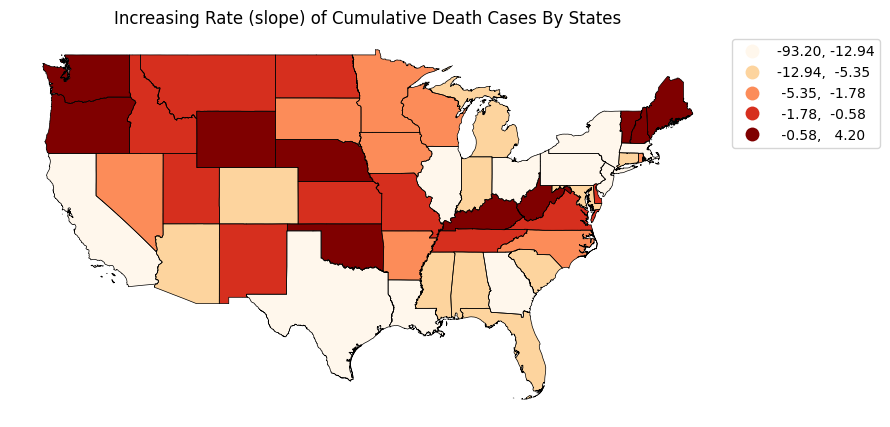

In [49]:
### YOUR CODE HERE ###

def linear_regression(sample):
    x = range(len(sample))
    y = sample
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    # Calculate the slope (m) and intercept (b) of the regression line
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = sum((xi - mean_x) ** 2 for xi in x)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x

    return slope, intercept
gdf_increase_rate = gdf_newly_confirmed.copy()
# calculate the slope for each state
col = [col for col in gdf_increase_rate.columns if col not in ['Province_State', 'geometry', 'Population']]
gdf_increase_rate['slope'] = gdf_increase_rate.apply(lambda x: linear_regression(x[col])[0], axis=1)
# choropleth based on the slope
gdf_increase_rate.plot(figsize=(10, 5), column='slope', cmap='OrRd',
                       legend=True,scheme='quantiles',
                         legend_kwds={"bbox_to_anchor": (1, 1),
                                      'loc': 'upper left'})
gdf_increase_rate.boundary.plot(color='k', linewidth=0.5,ax = plt.gca())
plt.title('Increasing Rate (slope) of Cumulative Death Cases By States')
plt.axis('off')
plt.show()



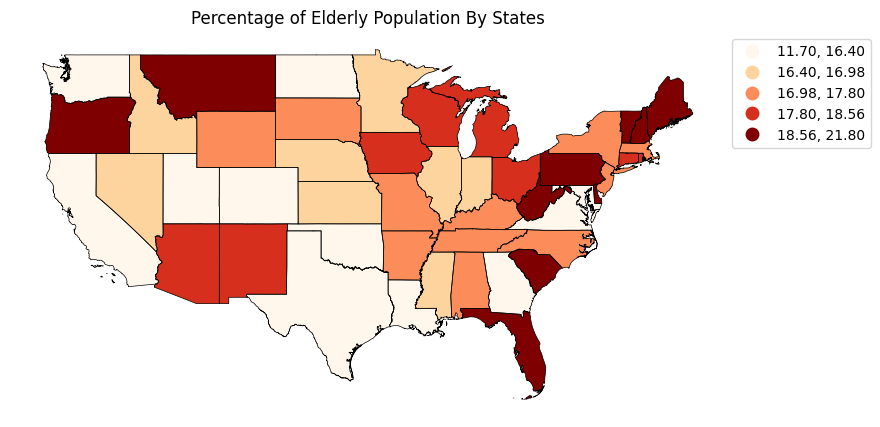

In [50]:
### DO NOT MODIFY ###
# run the code the plot the precentage of population aged 65+ by states choropleth
elder_population = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/elder_population.csv')[['State','Population Ages 65+ (percent of state population)']]
elder_population.columns = ['Province_State', 'Elderly']
# read the shapefile
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
gdf_elder = gdf_states.merge(elder_population)
gdf_elder.plot(column='Elderly', cmap='OrRd', legend=True, figsize=(10, 5), scheme='quantiles',
               legend_kwds={"bbox_to_anchor": (1, 1),'loc': 'upper left'})
gdf_elder.boundary.plot(figsize=(10, 5),ax = plt.gca(), color='k', linewidth=0.5)


plt.title('Percentage of Elderly Population By States')
plt.axis('off')
plt.show()


**Your Text Answer**
One state that can support this claim is Oregan (consistently high) and one
state that contradicts this claim is Washington (high slope to low percentage of elderly population).